# Visualisation of the captions predicted by the captioning model

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from pycocotools.coco import COCO
from Utils.eval import COCOEvalCap
import pandas as pd

In [2]:
IMG_PATH = 'C:/Users/rapha/Documents/Dataset/COCOCaptions/img/val2014'
# Temperature = 0
RES_PATH1 = './example/eval_1ep_t00.json'
RES_PATH_2b = './example/eval_2ep_t00.json'
RES_PATH_ca = './example/eval_ca_ep1_t00.json'

# Temperature = 0.2
RES_PATH1_02 = './example/eval_1ep_t02.json'
RES_PATH2_02 = './example/eval_2ep_t02.json'
# Temperature = 0.6
RES_PATH = './example/evaluation_1epoch.json'
RES_PATH_2 = './example/evaluation_2epochs.json'

RES_early = './example/eval_early_t00.json'


model_1_path = [RES_PATH1, RES_PATH, RES_PATH1_02]
model_2_path = [RES_PATH_2b, RES_PATH2_02, RES_PATH_2]

model_t00 = [RES_PATH1, RES_PATH_2b, RES_PATH_ca]

annotation_file = './example/captions_val2014.json'

In [3]:
model_path_newCA = ['res_files/new_CA/2ca_ep2/eval_2ca_ep2_t0.0.json', 'res_files/new_CA/2ca_ep5/eval_2ca_ep5_t0.0.json']

In [3]:
file_0 = 'res_files/ep1/eval_ep1_80_t0.0.json'
file_1 = 'res_files/ep1/eval_ep1_80_t0.1.json'
file_2 = 'res_files/ep1/eval_ep1_80_t0.2.json'
#model_path = [file_0, file_1, file_2]
model_path = ['res_files/test_data/1ca_ep1/eval_1ca_ep1_t0.0.json']

In [3]:
file_0_2ca = 'res_files/2ca_ep1/eval_2ca_ep1_t0.0.json'
file_1_2ca = 'res_files/2ca_ep1/eval_2ca_ep1_t0.1.json'
file_2_2ca = 'res_files/2ca_ep1/eval_2ca_ep1_t0.2.json'
model_path_2ca = [file_0_2ca, file_1_2ca, file_2_2ca]

In [4]:
file_0_2ca_wo = 'res_files/w_o_mask/2ca_ep1/eval_wo_mask_2ca_ep1_t0.0.json'
file_1_2ca_wo = 'res_files/w_o_mask/2ca_ep1/eval_wo_mask_2ca_ep1_t0.1.json'
#file_2_2ca_wo = 'res_files/2ca_ep1/eval_2ca_ep1_t0.2.json'
path_2ca_wo = [file_0_2ca_wo, file_1_2ca_wo]

In [15]:
model_path_3ca = ['res_files/3ca_ep1/eval_3ca_ep1_t0.0.json','res_files/3ca_ep1/eval_3ca_ep1_t0.1.json']

In [4]:
file_gate_0 = 'res_files/gate_early/eval_early_gate_t0.0.json'
file_gate_1 = 'res_files/gate_early/eval_early_gate_t0.1.json'
file_gate_2 = 'res_files/gate_early/eval_early_gate_t0.2.json'
model_path_gate = [file_gate_0, file_gate_1, file_gate_2]

In [66]:
model_2ca_2ep = ['res_files/2ca_ep2/eval_2ca_ep2_t0.0.json']

In [5]:
def plot_loss(loss_path):
    with open(loss_path, "rb") as f:
        loss_data = np.load(f)

    #print(loss_data)
    loss_train = {}
    loss_val = {}
    for i in range(1, loss_data.shape[1]+1):
        loss_train[i] = loss_data[0][i-1]
        loss_val[i] = loss_data[1][i-1]



    plt.figure()
    plt.title("Loss value during fine-tuning")
    plt.plot(loss_train.keys(), loss_train.values(), '-o', color='blue', label='train')
    plt.plot(loss_val.keys(), loss_val.values(), '-o', color='red', label='val')
    plt.xlabel("Epoch")
    plt.ylabel("Cross-entropy value")
    plt.legend()
    plt.show()

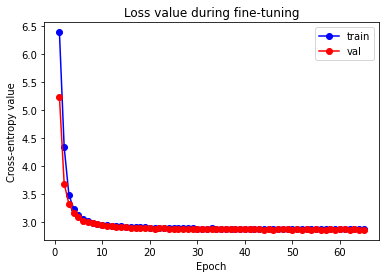

In [6]:
plot_loss("./res_files/gate_early/loss_gate_early.npy")

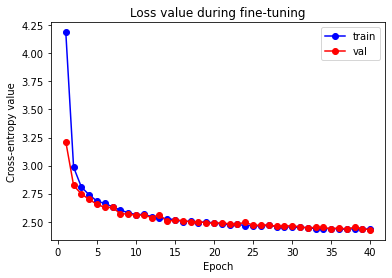

In [6]:
plot_loss("./res_files/loss_ca1_early.npy")

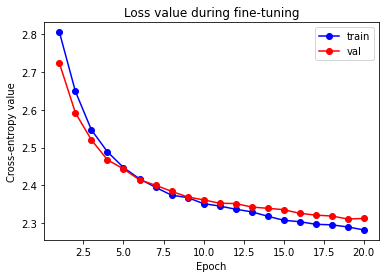

In [7]:
plot_loss("./example/loss_early_stop.npy")

## 1. Compute the automatic metrics

Use of the [pycocoevalcap package](https://github.com/salaniz/pycocoevalcap) to compute the following metrics : BLEU, ROUGE, METEOR, CIDEr

In [4]:
coco = COCO(annotation_file)
def evaluate_model(list_path, coco):
    coco_eval_list = []
    for i in range(len(list_path)):
        coco_result = coco.loadRes(list_path[i])

        # create coco_eval object by taking coco and coco_result
        coco_eval = COCOEvalCap(coco, coco_result)
        coco_eval.params['image_id'] = coco_result.getImgIds()
        coco_eval.evaluate()
        coco_eval_list.append(coco_eval)
    return coco_eval_list


loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


In [5]:
coco_eval_newCA = evaluate_model(model_path_newCA, coco)

Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 39514, 'reflen': 37899, 'guess': [39514, 35466, 31418, 27370], 'correct': [23742, 11620, 4861, 1920]}
ratio: 1.0426132615636021
Bleu_1: 0.601
Bleu_2: 0.444
Bleu_3: 0.312
Bleu_4: 0.215
computing METEOR score...
METEOR: 0.210
computing Rouge score...
ROUGE_L: 0.481
computing CIDEr score...
CIDEr: 0.719
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 43903, 'reflen': 39636, 'guess': [43903, 39853, 35803, 31753], 'correct': [25766, 13128, 5797, 2429]}
ratio: 1.10765465738215
Bleu_1: 0.587
Bleu_2: 0.440
Bleu_3: 0.315
Bleu_4: 0.221
computing METEOR score...
METEOR: 0.225
computing Rouge score...
ROUGE_L: 0.491
computing CIDEr score...
CIDEr: 0.776


In [ ]:
coco_eval = evaluate_model(model_path, coco)

In [10]:
coco_eval_early = evaluate_model(model_path_gate, coco)

Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 28350, 'reflen': 34483, 'guess': [28350, 24300, 20250, 16200], 'correct': [14983, 3162, 407, 56]}
ratio: 0.8221442449902613
Bleu_1: 0.426
Bleu_2: 0.211
Bleu_3: 0.090
Bleu_4: 0.038
computing METEOR score...
METEOR: 0.102
computing Rouge score...
ROUGE_L: 0.338
computing CIDEr score...
CIDEr: 0.055
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 45938, 'reflen': 41296, 'guess': [45938, 41888, 37838, 33788], 'correct': [17371, 3457, 510, 102]}
ratio: 1.1124079814025303
Bleu_1: 0.378
Bleu_2: 0.177
Bleu_3: 0.075
Bleu_4: 0.034
computing METEOR score...
METEOR: 0.104
computing Rouge score...
ROUGE_L: 0.313
computing CIDEr score...
CIDEr: 0.048
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
tokenization

In [5]:
coco_eval_2ca = evaluate_model(model_path_2ca, coco)

Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 58122, 'reflen': 43894, 'guess': [58122, 54072, 50022, 45972], 'correct': [21892, 8208, 2497, 747]}
ratio: 1.3241445300040706
Bleu_1: 0.377
Bleu_2: 0.239
Bleu_3: 0.142
Bleu_4: 0.083
computing METEOR score...
METEOR: 0.154
computing Rouge score...
ROUGE_L: 0.358
computing CIDEr score...
CIDEr: 0.266
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 58075, 'reflen': 43989, 'guess': [58075, 54025, 49975, 45925], 'correct': [21834, 8194, 2493, 748]}
ratio: 1.320216417740769
Bleu_1: 0.376
Bleu_2: 0.239
Bleu_3: 0.142
Bleu_4: 0.083
computing METEOR score...
METEOR: 0.153
computing Rouge score...
ROUGE_L: 0.358
computing CIDEr score...
CIDEr: 0.262
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
tokenizati

In [7]:
coco_eval_2ca_wo = evaluate_model(path_2ca_wo, coco)

Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 101120, 'reflen': 51206, 'guess': [101120, 97070, 93159, 89249], 'correct': [6160, 1181, 236, 74]}
ratio: 1.974768581806781
Bleu_1: 0.061
Bleu_2: 0.027
Bleu_3: 0.012
Bleu_4: 0.006
computing METEOR score...
METEOR: 0.048
computing Rouge score...
ROUGE_L: 0.089
computing CIDEr score...
CIDEr: 0.019
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 101213, 'reflen': 51008, 'guess': [101213, 97163, 93317, 89473], 'correct': [5729, 1048, 214, 63]}
ratio: 1.9842573713926839
Bleu_1: 0.057
Bleu_2: 0.025
Bleu_3: 0.011
Bleu_4: 0.006
computing METEOR score...
METEOR: 0.045
computing Rouge score...
ROUGE_L: 0.082
computing CIDEr score...
CIDEr: 0.018


In [16]:
coco_eval_3ca = evaluate_model(model_path_3ca, coco)

Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 68018, 'reflen': 46939, 'guess': [68018, 63968, 59918, 55868], 'correct': [23501, 9210, 2948, 962]}
ratio: 1.4490722000894471
Bleu_1: 0.346
Bleu_2: 0.223
Bleu_3: 0.135
Bleu_4: 0.081
computing METEOR score...
METEOR: 0.158
computing Rouge score...
ROUGE_L: 0.349
computing CIDEr score...
CIDEr: 0.236
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 67721, 'reflen': 46814, 'guess': [67721, 63671, 59621, 55571], 'correct': [23421, 9119, 2857, 943]}
ratio: 1.446597171786187
Bleu_1: 0.346
Bleu_2: 0.223
Bleu_3: 0.133
Bleu_4: 0.080
computing METEOR score...
METEOR: 0.158
computing Rouge score...
ROUGE_L: 0.349
computing CIDEr score...
CIDEr: 0.234


In [70]:
coco_eval_2ca_2ep = evaluate_model(model_2ca_2ep, coco)

Loading and preparing results...
DONE (t=0.14s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 83235, 'reflen': 49393, 'guess': [83235, 79185, 75135, 71085], 'correct': [22848, 8322, 2366, 689]}
ratio: 1.685157815884808
Bleu_1: 0.274
Bleu_2: 0.170
Bleu_3: 0.097
Bleu_4: 0.054
computing METEOR score...
METEOR: 0.141
computing Rouge score...
ROUGE_L: 0.299
computing CIDEr score...
CIDEr: 0.141


### Example of a sample from the dataset:

A man riding a skateboard up the side of a ramp.
a man that is jumping a skateboard 
a person jumping a skate board in the air 
A boy on a skateboard hovers over a half pipe.
A skateboarder in the air after going up a ramp. 


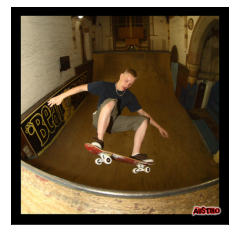

In [10]:
f, ax = plt.subplots()
len_image_id = 6
id = list(coco.imgToAnns.keys())[np.random.randint(40000)]
x = coco.imgToAnns[id]
filename = 'COCO_val2014_000000{}{}.jpg'.format('0'*(len_image_id-len(str(id))), id)
img = cv2.imread(os.path.join(IMG_PATH, filename))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ax.imshow(img)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title('Image {}'.format(i))
for i in range(len(x)):
    print(x[i]['caption'])
plt.show()

## 2. Results of the computed metrics

In [6]:
visual_gpt = {'Bleu_1':0.582, 'Bleu_2':None, 'Bleu_3':None,  'Bleu_4':0.164, 'METEOR':0.185, 'ROUGE_L':0.419, "CIDEr":0.451}

In [12]:
def plot_with_df(coco_evals, columns, SOTA=None, display_df=True, **kwargs):
    """
    Plot the automated metrics with using dataframe
    """
    # List of dict
    list_data = [coco_evals[i].eval for i in range(len(coco_evals))]
    if SOTA is not None:
        list_data.insert(0, SOTA)

    df = pd.DataFrame(data = list_data, index=columns)
    df = df.T


    ax = df.plot(kind='bar', rot=0, xlabel='Metrics', ylabel='Value',figsize=(10, 8), table=False, edgecolor='black', **kwargs)

    # add a little space at the top of the plot for the annotation
    ax.margins(y=0.1)

    # move the legend out of the plot
    ax.legend(title='Model', bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.show()
    if display_df:
        display(df)

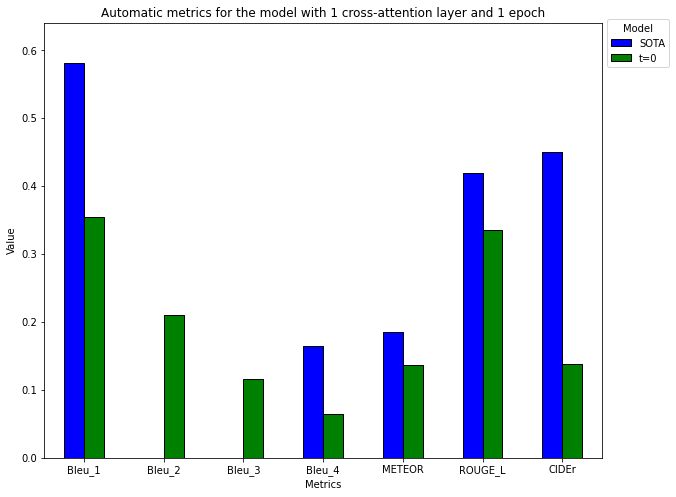

SOTA       t=0
Bleu_1   0.582  0.354483
Bleu_2     NaN  0.210971
Bleu_3     NaN  0.116624
Bleu_4   0.164  0.064295
METEOR   0.185  0.137205
ROUGE_L  0.419  0.335747
CIDEr    0.451  0.138102

In [13]:
plot_with_df(coco_eval, ['SOTA', 't=0'], SOTA=visual_gpt, color=['blue', 'green'], title='Automatic metrics for the model with 1 cross-attention layer and 1 epoch')

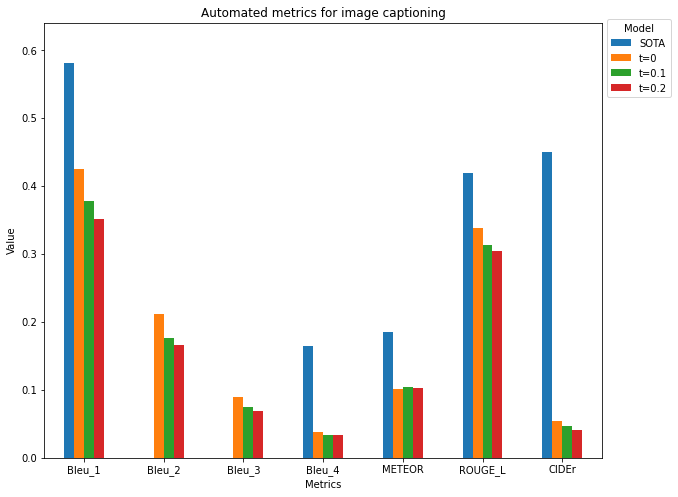

SOTA       t=0     t=0.1     t=0.2
Bleu_1   0.582  0.425691  0.378140  0.351441
Bleu_2     NaN  0.211227  0.176657  0.165523
Bleu_3     NaN  0.089723  0.074926  0.069304
Bleu_4   0.164  0.037658  0.033569  0.033068
METEOR   0.185  0.101649  0.103707  0.103029
ROUGE_L  0.419  0.338035  0.313151  0.304706
CIDEr    0.451  0.054957  0.047550  0.041649

In [14]:
plot_with_df(coco_eval_early, ['SOTA', 't=0', 't=0.1', 't=0.2'], SOTA=visual_gpt, display_df=True)

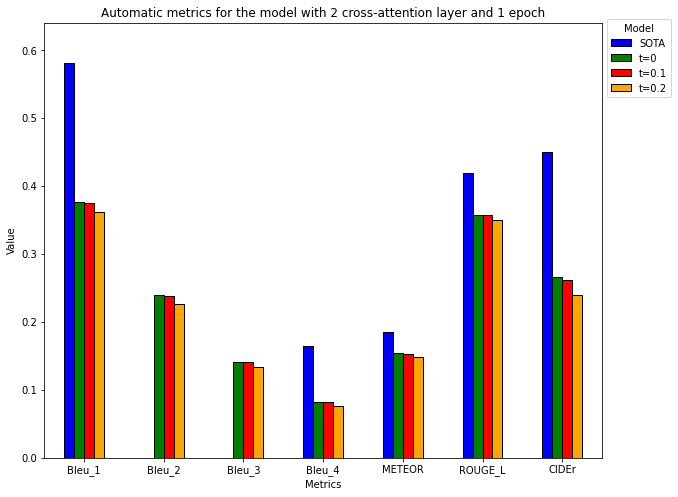

SOTA       t=0     t=0.1     t=0.2
Bleu_1   0.582  0.376656  0.375962  0.362388
Bleu_2     NaN  0.239114  0.238794  0.227126
Bleu_3     NaN  0.141848  0.141690  0.133079
Bleu_4   0.164  0.082523  0.082502  0.076563
METEOR   0.185  0.153844  0.153280  0.149230
ROUGE_L  0.419  0.358263  0.357614  0.349670
CIDEr    0.451  0.265986  0.261936  0.239790

In [10]:
plot_with_df(coco_eval_2ca, ['SOTA', 't=0', 't=0.1', 't=0.2'], SOTA=visual_gpt, display_df=True, color=['blue', 'green', 'red', 'orange'], title='Automatic metrics for the model with 2 cross-attention layer and 1 epoch')

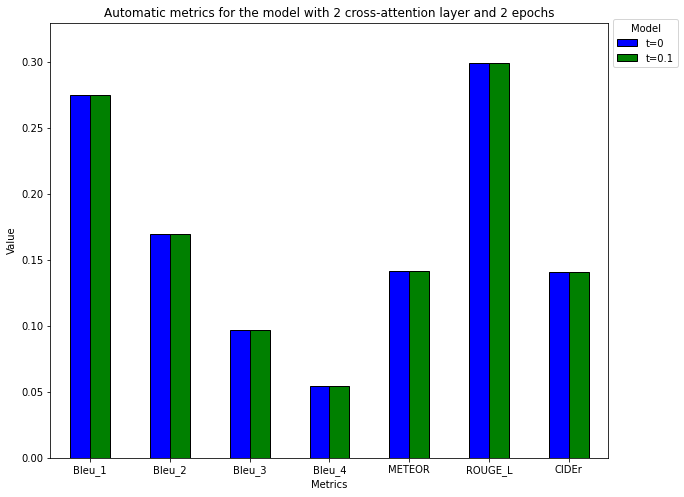

t=0     t=0.1
Bleu_1   0.274500  0.274500
Bleu_2   0.169849  0.169849
Bleu_3   0.096850  0.096850
Bleu_4   0.054473  0.054473
METEOR   0.141379  0.141379
ROUGE_L  0.299428  0.299428
CIDEr    0.141070  0.141070

In [71]:
plot_with_df(coco_eval_2ca_2ep, ['t=0', 't=0.1'], SOTA=None, display_df=True, color=['blue', 'green'], title='Automatic metrics for the model with 2 cross-attention layer and 2 epochs')

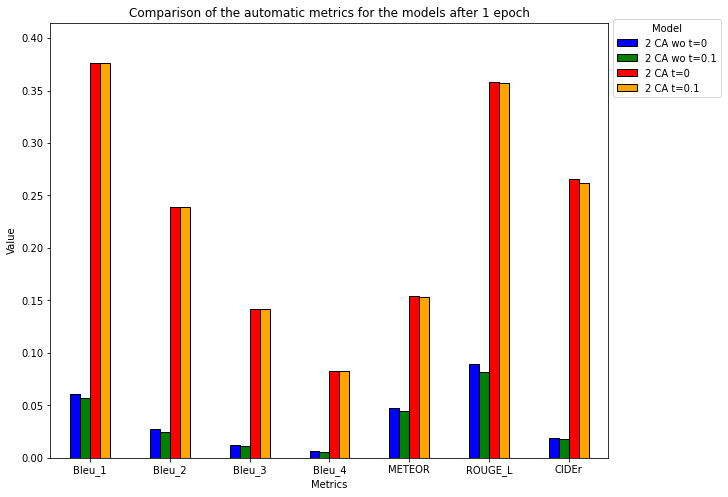

2 CA wo t=0  2 CA wo t=0.1  2 CA t=0  2 CA t=0.1
Bleu_1      0.060918       0.056603  0.376656    0.375962
Bleu_2      0.027224       0.024709  0.239114    0.238794
Bleu_3      0.012337       0.011187  0.141848    0.141690
Bleu_4      0.006281       0.005603  0.082523    0.082502
METEOR      0.047851       0.044950  0.153844    0.153280
ROUGE_L     0.089042       0.081883  0.358263    0.357614
CIDEr       0.019423       0.017535  0.265986    0.261936

In [11]:
plot_with_df([coco_eval_2ca_wo[0], coco_eval_2ca_wo[1], coco_eval_2ca[0], coco_eval_2ca[1]], ['2 CA wo t=0', '2 CA wo t=0.1','2 CA t=0','2 CA t=0.1'], SOTA=None, display_df=True, color=['blue', 'green', 'red', 'orange'], title='Comparison of the automatic metrics for the models after 1 epoch')

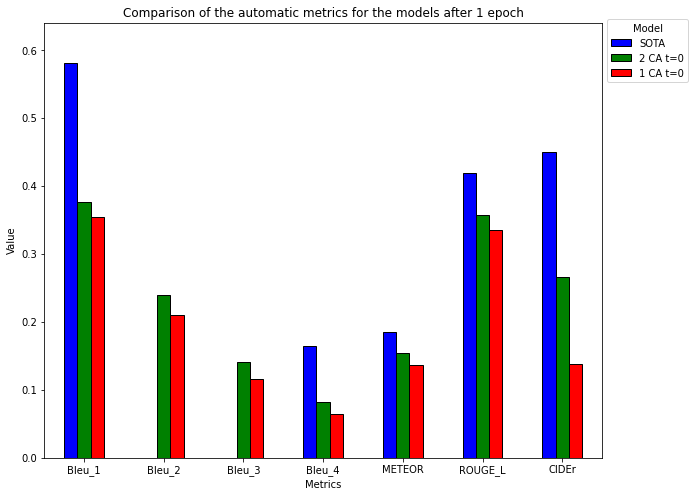

SOTA  2 CA t=0  1 CA t=0
Bleu_1   0.582  0.376656  0.354483
Bleu_2     NaN  0.239114  0.210971
Bleu_3     NaN  0.141848  0.116624
Bleu_4   0.164  0.082523  0.064295
METEOR   0.185  0.153844  0.137205
ROUGE_L  0.419  0.358263  0.335747
CIDEr    0.451  0.265986  0.138102

In [14]:
plot_with_df([coco_eval_2ca[0], coco_eval[0]], ['SOTA', '2 CA t=0', '1 CA t=0'], SOTA=visual_gpt, display_df=True, color=['blue', 'green', 'red'], title='Comparison of the automatic metrics for the models after 1 epoch')

## 3. Visualisation of some captions

In [6]:
n_visu = 10 # number of samples to visualize

### 3.1 The worst results

In [7]:
target_metric = 'CIDEr'
#coco_eval_sort = sorted(coco_eval1, key=lambda x:x.eval[target_metric])
#coco_eval2_sort = sorted(coco_eval2, key=lambda x:x.eval[target_metric])
#eval_sorted = sorted(coco_eval_sort[-1].evalImgs, key=lambda x:x[target_metric])

In [9]:
coco_eval_sort = sorted(coco_eval, key=lambda x:x.eval[target_metric])
eval_sorted = sorted(coco_eval_sort[0].evalImgs, key=lambda x:x[target_metric])

NameError: name 'coco_eval' is not defined

In [8]:
coco_eval_sort_newCA = sorted(coco_eval_newCA, key=lambda x:x.eval[target_metric])
eval_sorted_newCA = sorted(coco_eval_sort_newCA[-1].evalImgs, key=lambda x:x[target_metric])

In [9]:
coco_2CA_eval_sort = sorted(coco_eval_2ca, key=lambda x:x.eval[target_metric])
eval_2CA_sorted = sorted(coco_2CA_eval_sort[-1].evalImgs, key=lambda x:x[target_metric])

NameError: name 'coco_eval_2ca' is not defined

In [10]:
def plot_image_captions(target_imgs, target_metric, coco_eval, coco_eval2=None):
    for i, x in enumerate(target_imgs):
        f, ax = plt.subplots()
        len_image_id = 6
        filename = 'COCO_val2014_000000{}{}.jpg'.format('0'*(len_image_id-len(str(x['image_id']))), x['image_id'])
        img = cv2.imread(os.path.join(IMG_PATH, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.set_title('Image {}'.format(i))
        plt.show()
        print('Model 1 : {}'.format(
            coco_eval.cocoRes.imgToAnns[x['image_id']][0]['caption']))
            #np.round(coco_eval.imgToEval[x['image_id']][target_metric], 5)))
        #print('Model 1 (t=0) : {} ({} = {})'.format(
        #    coco_eval1.cocoRes.imgToAnns[x['image_id']][0]['caption'],
        #    target_metric,
        #    np.round(coco_eval.imgToEval[x['image_id']][target_metric], 5)))
        if coco_eval2 is not None:
            print('Model 2 : {}'.format(
                coco_eval2.cocoRes.imgToAnns[x['image_id']][0]['caption']))
                #np.round(coco_eval2.imgToEval[x['image_id']][target_metric], 5)))
        print('GT 1 : ', coco.imgToAnns[x['image_id']][0]['caption'])
        print('GT 2 : ', coco.imgToAnns[x['image_id']][1]['caption'])
        if coco_eval2 is not None:
            dataframe = pd.DataFrame([coco_eval.imgToEval[x['image_id']],  coco_eval2.imgToEval[x['image_id']]], index=['Model 1', 'Model 2'])
        else:
            dataframe = pd.DataFrame([coco_eval.imgToEval[x['image_id']]], index=['Model'])
        display(dataframe)
        print('---'*10)

In [11]:
worst_cap = eval_sorted_newCA[0:n_visu]


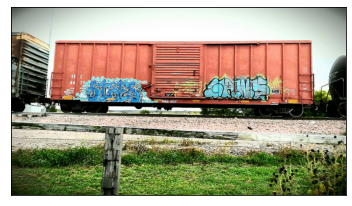

Model 1 : a graffiti graffiti graffiti graffiti graffiti graffiti graffiti graffiti graffiti graff
Model 2 : graff graff graff graff graff graff graff graff graff graff graff graff graff graff graff
GT 1 :  A train car with blue graffiti on the side of it .
GT 2 :  an image of a train with graffiti on the side


image_id        Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1      7211  1.818182e-01  4.264014e-09  1.264149e-11  7.088857e-13   
Model 2      7211  6.666667e-17  6.900656e-17  7.155046e-17  7.432998e-17   

          METEOR   ROUGE_L     CIDEr  
Model 1  0.08377  0.203673  0.128857  
Model 2  0.00000  0.000000  0.000000

------------------------------


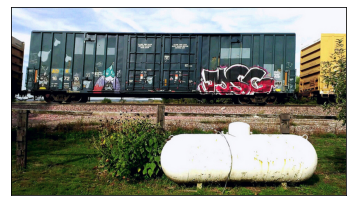

Model 1 : a graffiti graffiti graffiti graffiti graffiti graffiti graffiti graffiti graffiti graff
Model 2 : graff graff graff graff graff graff graff graff graff graff graff graff graff graff graff
GT 1 :  a train cart is near a white tank
GT 2 :  A freight train traveling past a propane tank.


image_id        Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    356298  1.818182e-01  1.348400e-01  1.264149e-06  3.986357e-09   
Model 2    356298  6.666667e-17  6.900656e-17  7.155046e-17  7.432998e-17   

           METEOR   ROUGE_L     CIDEr  
Model 1  0.076275  0.192126  0.036746  
Model 2  0.000000  0.000000  0.000000

------------------------------


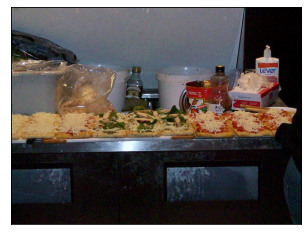

Model 1 : a table with a table with a table with a table with a table with a table with a table with a table with a table with a table with
Model 2 : a counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter counter
GT 1 :  A picture of some food on a table.
GT 2 :  A table with three each of three different kinds of pizza.


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    307166  0.166667  1.313064e-01  8.507553e-02  1.228889e-05   
Model 2    307166  0.033333  1.072113e-09  3.449644e-12  1.974648e-13   

           METEOR   ROUGE_L         CIDEr  
Model 1  0.180679  0.247967  1.223947e-03  
Model 2  0.015936  0.058767  1.818739e-10

------------------------------


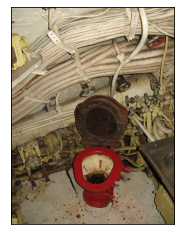

Model 1 : a red and white topped topped with a red and white topped with a red and white topped with a red and white topped with
Model 2 : a fire hydrant is a fire hydrant is a fire hydrant is a fire hydrant is a fire hydrant is a fire hydrant is
GT 1 :  A red toilet in a very small bathroom.
GT 2 :  An old toilet painted red with a wooden lid. 


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    263796  0.200000  1.290994e-01  8.982012e-07  2.395657e-09   
Model 2    263796  0.083333  1.903467e-09  5.481374e-12  2.975858e-13   

           METEOR   ROUGE_L         CIDEr  
Model 1  0.098720  0.247716  2.110932e-03  
Model 2  0.035556  0.137387  1.290274e-09

------------------------------


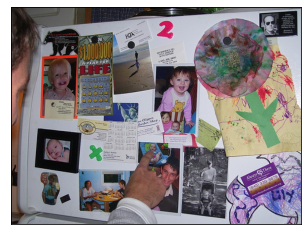

Model 1 : a child with a child with a child with a child with a child with a child with a child with a child with a child with a child with
Model 2 : a child with a child with a child with a child with a child with a child with a child with a child with a child with a child with
GT 1 :  A man pointing to a baby's picture on a bulletin board. 
GT 2 :  A man pointing to a baby picture on a refrigerator door.


image_id  Bleu_1        Bleu_2        Bleu_3        Bleu_4    METEOR  \
Model 1    191270     0.1  1.856953e-09  4.975247e-12  2.598783e-13  0.086549   
Model 2    191270     0.1  1.856953e-09  4.975247e-12  2.598783e-13  0.086549   

          ROUGE_L         CIDEr  
Model 1  0.159686  1.361407e-09  
Model 2  0.159686  1.361407e-09

------------------------------


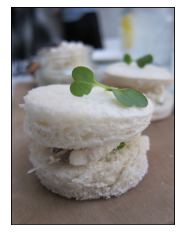

Model 1 : a white plate with a white table cloth
Model 2 : a white sandy white sandy white sandy white sandy white sandy white sandy white sandy white sandy white sandy white sand
GT 1 :  Two pieces of bread with a leafy green on top of it.
GT 2 :  This finger food is topped with a green leaf


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    428712  0.375000  2.314550e-01  2.074566e-06  6.500593e-09   
Model 2    428712  0.047619  1.543033e-09  5.004174e-12  2.888558e-13   

           METEOR   ROUGE_L         CIDEr  
Model 1  0.074456  0.326786  1.135231e-02  
Model 2  0.016360  0.075031  3.906387e-09

------------------------------


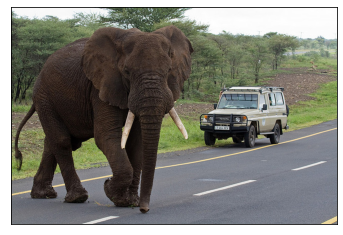

Model 1 : a large elephant walking through a field
Model 2 : a truck driving truck driving truck driving truck driving truck driving truck driving truck driving truck driving truck driving truck
GT 1 :  An elephant is crossing a road while a jeep is parked watching. 
GT 2 :  An elephant crossing the road in front of an SUV.



image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    555472  0.619198  4.229931e-01  3.142087e-01  5.091997e-05   
Model 2    555472  0.050000  1.622214e-09  5.268027e-12  3.045256e-13   

           METEOR   ROUGE_L         CIDEr  
Model 1  0.187321  0.379471  7.287038e-01  
Model 2  0.043425  0.070930  4.028056e-09

------------------------------


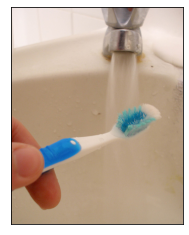

Model 1 : a toothbrush is a toothbrush is a toothbrush is a toothbrush is a toothbrush is
Model 2 : a blue tooth blue tooth blue tooth blue tooth blue tooth blue tooth blue tooth blue tooth blue tooth blue to
GT 1 :  A person holding a toothbrush under the running water of a faucet.
GT 2 :  A toothbrush being held under a water facet.


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1     58079  0.333333  2.182179e-01  1.541508e-01  2.350520e-05   
Model 2     58079  0.047619  1.543033e-09  5.004174e-12  2.888558e-13   

           METEOR   ROUGE_L         CIDEr  
Model 1  0.150701  0.321476  2.232545e-01  
Model 2  0.015474  0.075031  4.643732e-09

------------------------------


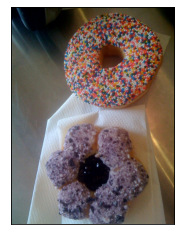

Model 1 : a table with a table with a table with a table with a table with a table with a table with a table with a table with a table with
Model 2 : a donut is a donut is a donut is a donut is a donut is a donut is a donut is a don
GT 1 :  A metal table holding two donuts covered in sprinkles.
GT 2 :  Two donuts are placed together on a napkin. 


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    533750  0.133333  6.780635e-02  5.475968e-07  1.570380e-09   
Model 2    533750  0.130435  2.434924e-09  6.560201e-12  3.446913e-13   

           METEOR   ROUGE_L         CIDEr  
Model 1  0.114091  0.219820  9.012426e-05  
Model 2  0.102128  0.195722  5.258184e-09

------------------------------


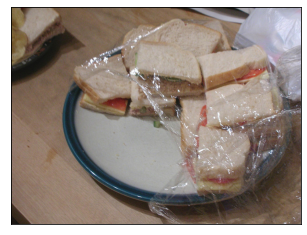

Model 1 : a sandwich on a plate with a fork
Model 2 : a sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sandwich sand
GT 1 :  A plate filled with little sandwiches covered in plastic wrap.
GT 2 :  A plate of sandwiches at a covered in plastic wrap


image_id  Bleu_1        Bleu_2        Bleu_3        Bleu_4    METEOR  \
Model 1    187979  0.6250  2.988072e-01  2.459670e-06  7.386100e-09  0.128372   
Model 2    187979  0.0625  2.041241e-09  6.676573e-12  3.889819e-13  0.018018   

          ROUGE_L         CIDEr  
Model 1  0.375000  3.359682e-01  
Model 2  0.088663  6.496607e-09

------------------------------


In [12]:
plot_image_captions(worst_cap, target_metric, coco_eval_sort_newCA[0], coco_eval_sort_newCA[-1])

### 3.2 Some random results

In [13]:
n_visu = 10

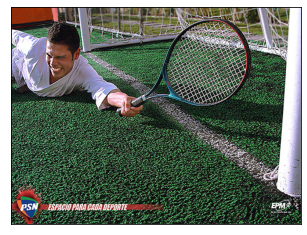

Model 1 : a man is playing tennis with a man
Model 2 : a man is playing tennis with a ball
GT 1 :  Man with tennis racket on green turf in front of a goal
GT 2 :  this man is playing tennis in the grass


image_id  Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    338600   0.875  0.707107  0.629961  0.472871  0.332015  0.544643   
Model 2    338600   0.875  0.707107  0.629961  0.472871  0.332015  0.544643   

            CIDEr  
Model 1  1.090696  
Model 2  1.049892

------------------------------


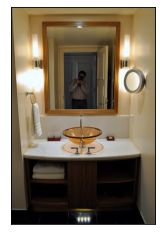

Model 1 : a man in a bathroom taking a picture of his reflection in the mirror
Model 2 : a person taking a picture of a camera taking a picture of a camera taking a picture of a camera taking a picture of a camera taking a picture of
GT 1 :  A man's reflection is in a mirror of a bathroom.
GT 2 :  A person taking a picture of a bathroom sink. 


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    513129  0.928571  0.755929  0.575370  0.362754  0.426675  0.515493   
Model 2    513129  0.266667  0.234888  0.214377  0.195460  0.306745  0.397579   

            CIDEr  
Model 1  1.464120  
Model 2  0.002139

------------------------------


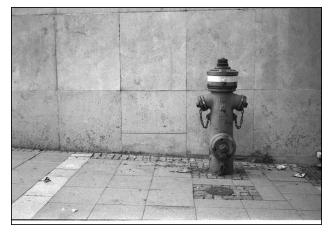

Model 1 : a fire hydrant is a hydrant that is placed near a fire hydrant is a hydrant that is placed near a fire hydrant is a
Model 2 : a fire hydrant is a hydrant that is attached to a fire hydrant
GT 1 :  A gray fire hydrant sitting next to a brick wall.
GT 2 :  A fire hydrant jutting out a sidewalk next to a wall.


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    118715  0.200000  0.129099  0.089820  0.000013  0.195638  0.309645   
Model 2    118715  0.427367  0.314533  0.202696  0.000030  0.205008  0.507628   

            CIDEr  
Model 1  0.038580  
Model 2  0.828631

------------------------------


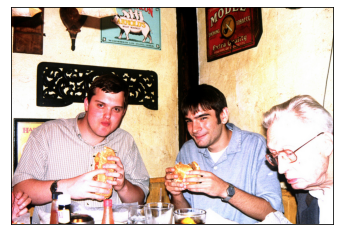

Model 1 : two men sitting on a couch with a table and a drink
Model 2 : a group of men sitting around a table eating pizza
GT 1 :  three guys sitting down eating sandwiches and smiling
GT 2 :  Three men eating sandwiches at a corner table.


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    317595  0.583333  7.282191e-09  1.743846e-11  8.761337e-13   
Model 2    317595  0.600000  8.164966e-09  2.027401e-11  1.044552e-12   

           METEOR   ROUGE_L     CIDEr  
Model 1  0.137931  0.356725  0.322616  
Model 2  0.194175  0.425087  0.625939

------------------------------


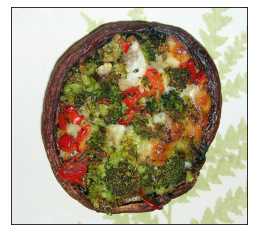

Model 1 : a plate of food on a table
Model 2 : a pizza with broccoli and broccoli on a pizza
GT 1 :  a pizza with tomatoes broccoli cheese and other toppings
GT 2 :  A burned pizza with tomatoes, broccoli and cheese


image_id    Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
Model 1    577321  0.371519  7.326455e-09  2.103416e-11  1.191704e-12   
Model 2    577321  0.666667  5.000000e-01  3.293169e-01  4.939383e-05   

           METEOR   ROUGE_L     CIDEr  
Model 1  0.106077  0.366733  0.002911  
Model 2  0.231061  0.594542  0.680723

------------------------------


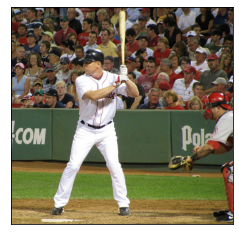

Model 1 : a baseball player is standing on a base
Model 2 : a batter is ready to hit the ball
GT 1 :  The baseball player is up to bat and ready to hit a homerun
GT 2 :  a man is holding a baseball bat at a game


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    227879  0.661873  0.577730  0.366160  0.000054  0.161580  0.409396   
Model 2    227879  0.772185  0.441248  0.305945  0.000047  0.188894  0.365269   

            CIDEr  
Model 1  1.095311  
Model 2  0.317782

------------------------------


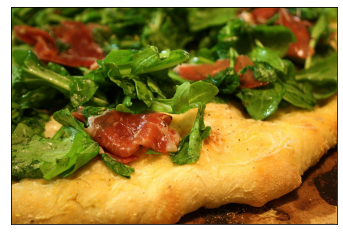

Model 1 : a pizza with a slice of pizza on top of it
Model 2 : a pizza with a pizza cutter
GT 1 :  A pizza covered in lots of greens on top of a table.
GT 2 :  A pizza with bacon bits and spinach leaves on it.


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    555412  0.818182  0.639602  0.514714  0.361328  0.219306  0.551371   
Model 2    555412  0.477688  0.453174  0.419030  0.364093  0.141940  0.419244   

            CIDEr  
Model 1  0.766970  
Model 2  0.477161

------------------------------


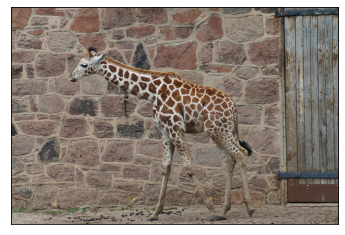

Model 1 : a giraffe standing in a field of grass
Model 2 : a giraffe standing next to a giraffe standing next to a giraffe standing next to a giraffe standing next to a g
GT 1 :  A giraffe standing in front of a stone building.
GT 2 :  A giraffe walking around past a wall and door


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    160199  0.750000  0.566947  0.474957  0.382603  0.257504  0.582061   
Model 2    160199  0.318182  0.246183  0.182322  0.000024  0.218971  0.434827   

            CIDEr  
Model 1  1.531158  
Model 2  0.062183

------------------------------


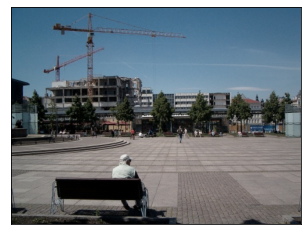

Model 1 : a large city in the middle of a city
Model 2 : a person sitting on a bench in front of a building
GT 1 :  A crane operates over the city being built
GT 2 :  A man that is sitting down on a bench.


image_id    Bleu_1    Bleu_2    Bleu_3        Bleu_4    METEOR  \
Model 1    573843  0.666667  0.288675  0.000002  6.674095e-09  0.112045   
Model 2    573843  0.909091  0.852803  0.827023  8.070557e-01  0.476849   

          ROUGE_L     CIDEr  
Model 1  0.400657  0.052401  
Model 2  0.820996  2.049103

------------------------------


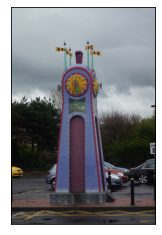

Model 1 : a clock tower with a clock on top of it
Model 2 : a clock tower is shown on a clock tower is shown on a clock tower is shown on a clock tower is shown on a clock tower is shown on
GT 1 :  A colorful clock tower sitting int he middle of a parking lot.
GT 2 :  A purple clock tower in the middle of a parking lot.


image_id  Bleu_1    Bleu_2        Bleu_3        Bleu_4    METEOR  \
Model 1    324492     0.9  0.774597  6.694329e-01  5.988060e-01  0.367571   
Model 2    324492     0.2  0.117444  7.897713e-07  2.066736e-09  0.152513   

          ROUGE_L     CIDEr  
Model 1  0.743902  1.898083  
Model 2  0.283985  0.001510

------------------------------


In [17]:
plot_image_captions(np.random.choice(eval_sorted_newCA, replace=False, size=n_visu), target_metric, coco_eval_sort_newCA[0], coco_eval_sort_newCA[-1] )

### 3.3 The best results

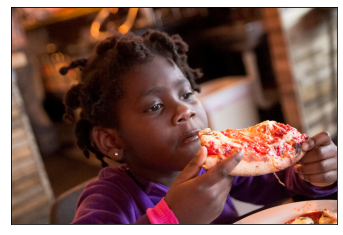

Model 1 : a little girl is eating a pizza
Model 2 : a young girl is eating a slice of pizza
GT 1 :  A child eating a piece of cheese pizza.
GT 2 :  An African American girl eating a slice of pizza.


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1     53990  0.743038  0.567505  0.382216  0.000059  0.332705  0.733467   
Model 2     53990  0.888889  0.816497  0.724920  0.596949  0.540779  0.951267   

            CIDEr  
Model 1  1.975727  
Model 2  3.582375

------------------------------


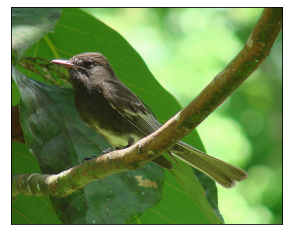

Model 1 : a bird sitting on a branch
Model 2 : a small bird perched on a tree branch
GT 1 :  A bird that is perched on a branch.
GT 2 :  A small bird perched on a branch with leaves


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    367433  0.716531  0.716531  0.716531  0.716531  0.370662  0.738499   
Model 2    367433  1.000000  0.925820  0.829827  0.765206  0.424120  0.814885   

            CIDEr  
Model 1  2.975031  
Model 2  3.785098

------------------------------


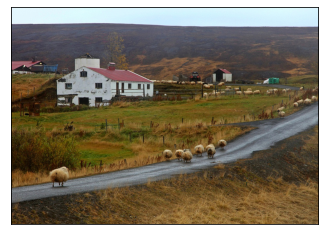

Model 1 : a herd of sheep grazing on a hillside
Model 2 : a herd of sheep walking down a road
GT 1 :  A herd of sheep walking down a rural country road.
GT 2 :  a herd of sheep walking down the road back to the farm 


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    189885  0.661873  0.577730  0.461332  0.362824  0.279437  0.698473   
Model 2    189885  0.882497  0.882497  0.882497  0.882497  0.424897  0.871429   

            CIDEr  
Model 1  1.536464  
Model 2  3.789821

------------------------------


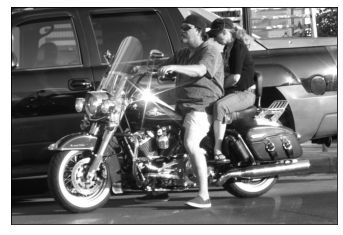

Model 1 : a man riding a motorcycle is riding down a street
Model 2 : a man and a woman are riding a motorcycle
GT 1 :  A man riding on the back of a motorcycle with a woman.
GT 2 :  there is a man and a woman that are riding a motorcycle


image_id  Bleu_1    Bleu_2    Bleu_3   Bleu_4    METEOR   ROUGE_L  \
Model 1    310553     0.8  0.596285  0.446289  0.00006  0.322932  0.572949   
Model 2    310553     1.0  1.000000  1.000000  1.00000  1.000000  1.000000   

            CIDEr  
Model 1  1.631769  
Model 2  3.880894

------------------------------


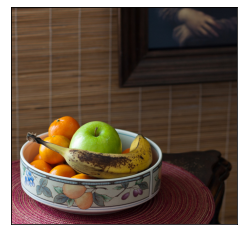

Model 1 : a bowl of fruit and a bowl of cereal
Model 2 : a bowl of fruit on a table
GT 1 :  a big bowl of different kinds of fruit inside
GT 2 :  A bowl of fruit that is sitting on a table.


image_id    Bleu_1   Bleu_2   Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    215901  0.777778  0.62361  0.48075  0.368894  0.331192  0.639413   
Model 2    215901  1.000000  1.00000  1.00000  1.000000  1.000000  1.000000   

            CIDEr  
Model 1  1.687190  
Model 2  3.962561

------------------------------


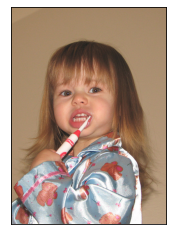

Model 1 : a little girl holding a little girl holding a little girl holding a little girl holding a little girl holding a little girl holding a little girl holding a little
Model 2 : a girl brushing her teeth with a toothbrush
GT 1 :  A small girl with long hair brushing her teeth
GT 2 :  A little girl brushing her teeth with an electric toothbrush.


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR  ROUGE_L  \
Model 1    187743  0.133333  0.095893  0.068993  0.000011  0.128233  0.21982   
Model 2    187743  0.882497  0.817033  0.732319  0.675292  0.350849  0.76250   

            CIDEr  
Model 1  0.000413  
Model 2  4.022931

------------------------------


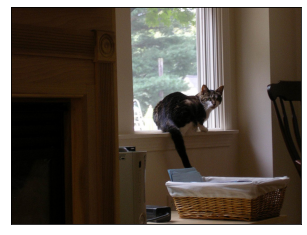

Model 1 : a cat is sitting on top of a window
Model 2 : a cat sitting on top of a window sill
GT 1 :  A cat sitting on top of a window sill.
GT 2 :  A cat is sitting in a window looking in the house.


image_id  Bleu_1  Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1    372979     1.0     1.0  0.949914  0.869442  0.466554  0.888889   
Model 2    372979     1.0     1.0  1.000000  1.000000  1.000000  1.000000   

            CIDEr  
Model 1  2.647543  
Model 2  4.276725

------------------------------


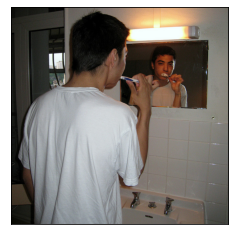

Model 1 : a man is taking a picture of a man taking a picture of a man taking a picture of a man taking a picture of a man taking a picture
Model 2 : a man brushing his teeth in a mirror
GT 1 :  A young guy standing by a mirror brushing his teeth.
GT 2 :  A man brushing his teeth in a mirror at a sink.


image_id    Bleu_1    Bleu_2        Bleu_3        Bleu_4    METEOR  \
Model 1    260059  0.200000  0.143839  9.040624e-07  2.287220e-09  0.110231   
Model 2    260059  0.778801  0.778801  7.788008e-01  7.788008e-01  0.477351   

          ROUGE_L     CIDEr  
Model 1  0.219820  0.000529  
Model 2  0.871429  5.056103

------------------------------


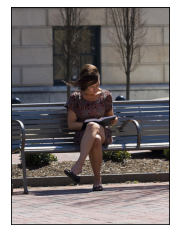

Model 1 : a woman sitting on a bench reading a book
Model 2 : a woman sitting on a bench reading a book
GT 1 :  a person sitting on a bench reading a book
GT 2 :  A woman sitting on a bench reading a book


image_id  Bleu_1  Bleu_2  Bleu_3  Bleu_4  METEOR  ROUGE_L     CIDEr
Model 1    314193     1.0     1.0     1.0     1.0     1.0      1.0  5.698228
Model 2    314193     1.0     1.0     1.0     1.0     1.0      1.0  5.698228

------------------------------


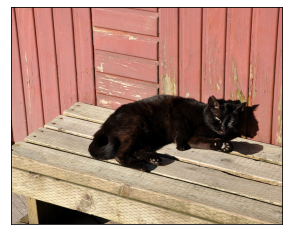

Model 1 : a cat sitting on a bench
Model 2 : a black cat laying on a wooden bench
GT 1 :  A cat laying on top of a wooden bench.
GT 2 :  A black cat laying on a wooden bench.


image_id    Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
Model 1     46316  0.716531  0.640885  0.604346  0.569836  0.330865  0.738499   
Model 2     46316  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

            CIDEr  
Model 1  1.978373  
Model 2  5.848075

------------------------------


In [15]:
best_cap = eval_sorted_newCA[-n_visu:]
plot_image_captions(best_cap, target_metric, coco_eval_sort_newCA[0], coco_eval_sort_newCA[-1])

In [18]:
time_files = ['res_files/2ca_ep1/eval_2ca_ep1_tinference_time.npy', 'res_files/3ca_ep1/eval_3ca_ep1_t0.0inference_time.npy']

In [25]:
times = {}
for idx, file in enumerate(time_files):
    x = np.load(file)
    times[idx+2] = np.sum(x)


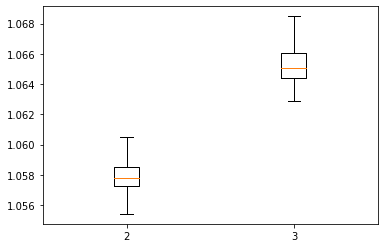

In [24]:
plt.figure()
plt.boxplot(times.values(), showfliers=False)
plt.xticks(range(1, len(list(times.keys())) + 1), list(times.keys()))
plt.show()

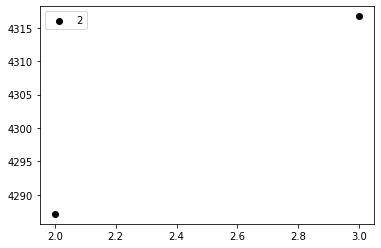

In [27]:
plt.figure()
colors = list("rgbcmyk")
plt.scatter(times.keys(),times.values(),color=colors.pop())
plt.legend(times.keys())
plt.show()